In [15]:
import numpy as np
import os

In [16]:
def transform_features(xs, ys, zs):
        RANGES = {
            'MIN_X': -270.0,
            'MAX_X': 270.0,
            'MIN_Y': -270.0,
            'MAX_Y': 270.0,
            'MIN_Z': -185.0,
            'MAX_Z': 1155.0,
            'MIN_LOG_A': 0.0,
            'MAX_LOG_A': 8.60
        }
        xs = (xs - RANGES['MIN_X'])/(RANGES['MAX_X'] - RANGES['MIN_X'])
        ys = (ys - RANGES['MIN_Y'])/(RANGES['MAX_Y'] - RANGES['MIN_Y'])
        zs = (zs - RANGES['MIN_Z'])/(RANGES['MAX_Z'] - RANGES['MIN_Z'])
        return xs, ys, zs

In [17]:
def rescale_feats(xs, ys, zs):
    RANGES = {
            'MIN_X': -270.0,
            'MAX_X': 270.0,
            'MIN_Y': -270.0,
            'MAX_Y': 270.0,
            'MIN_Z': -185.0,
            'MAX_Z': 1155.0,
            'MIN_LOG_A': 0.0,
            'MAX_LOG_A': 8.60
        }
    xs = xs * (RANGES['MAX_X'] - RANGES['MIN_X']) + RANGES['MIN_X']
    ys = ys * (RANGES['MAX_Y'] - RANGES['MIN_Y']) + RANGES['MIN_Y']
    zs = zs * (RANGES['MAX_Z'] - RANGES['MIN_Z']) + RANGES['MIN_Z']
    return xs, ys, zs

In [18]:
o_data = np.load('/home/DAVIDSON/bewagner/summer2023/16O+Mg22_Combined_Datasets/O16_size512_convertXYZ.npy')
print(o_data.shape)

(3529, 512, 3)


In [12]:
count = 0
for i, ev in enumerate(o_data):
    if len(np.unique(ev, axis=0)) >= 128:
        count += 1

print(count)

1946


In [13]:
filtered = np.zeros((count, 512, 3), dtype=float)

idx = 0
for ev in o_data:
    if len(np.unique(ev, axis=0)) >= 128:
        filtered[idx] = ev
        idx += 1

print(filtered[-1])

[[0.61274508 0.16289715 0.33820459]
 [0.62254899 0.15662014 0.34029228]
 [0.61764703 0.16581585 0.34446764]
 ...
 [0.4215686  0.44168723 0.88517745]
 [0.23529411 0.85286862 0.72651357]
 [0.24509801 0.87126007 0.71816284]]


In [14]:
np.save('./filtered_sim_O16.npy', filtered)

In [19]:
o_data = np.load('./filtered_sim_O16.npy')
print(o_data.shape)

(1946, 512, 3)


In [20]:
def rand_cut(event):

    rng = np.random.default_rng()

    

    pass

In [26]:
sorted = np.zeros((o_data.shape))

for i, ev in enumerate(o_data):
    sorted[i] = ev[ev[:, 2].argsort()]

In [30]:
cut = np.zeros((len(sorted), 384, 3))
rng = np.random.default_rng()


for i, ev in enumerate(sorted):
    start_idx = rng.integers(low=0, high=384, size=1)
    if i % 50 == 0:
        print(start_idx[0])
    cut[i] = np.delete(ev, np.s_[start_idx[0]:start_idx[0]+128], axis=0)

rng.shuffle(cut, axis=1)

for p in cut[0]:
    print(p[-1])

321
289
172
356
352
235
202
157
63
318
118
327
172
39
239
89
150
57
263
308
240
183
167
213
198
311
75
113
106
324
121
137
327
15
288
93
316
5
263
0.2254697286012526
0.18162839248434237
0.25052192066805845
0.24843423799582465
0.24425887265135698
0.16075156576200417
0.25052192066805845
0.19832985386221294
0.17954070981210857
0.18580375782881003
0.20876826722338204
0.21711899791231734
0.302713987473904
0.31106471816283926
0.21920668058455114
0.22129436325678498
0.31106471816283926
0.15031315240083507
0.15031315240083507
0.24425887265135698
0.1941544885177453
0.3048016701461378
0.25052192066805845
0.21920668058455114
0.31106471816283926
0.14822546972860126
0.2964509394572025
0.20250521920668058
0.1837160751565762
0.18997912317327767
0.20668058455114824
0.18997912317327767
0.2150313152400835
0.2546972860125261
0.1732776617954071
0.19832985386221294
0.23799582463465555
0.15657620041753653
0.2359081419624217
0.3048016701461378
0.3048016701461378
0.17745302713987474
0.22129436325678498
0.1899

In [31]:
for p in cut[0]:
    print(p[-1])

0.2254697286012526
0.18162839248434237
0.25052192066805845
0.24843423799582465
0.24425887265135698
0.16075156576200417
0.25052192066805845
0.19832985386221294
0.17954070981210857
0.18580375782881003
0.20876826722338204
0.21711899791231734
0.302713987473904
0.31106471816283926
0.21920668058455114
0.22129436325678498
0.31106471816283926
0.15031315240083507
0.15031315240083507
0.24425887265135698
0.1941544885177453
0.3048016701461378
0.25052192066805845
0.21920668058455114
0.31106471816283926
0.14822546972860126
0.2964509394572025
0.20250521920668058
0.1837160751565762
0.18997912317327767
0.20668058455114824
0.18997912317327767
0.2150313152400835
0.2546972860125261
0.1732776617954071
0.19832985386221294
0.23799582463465555
0.15657620041753653
0.2359081419624217
0.3048016701461378
0.3048016701461378
0.17745302713987474
0.22129436325678498
0.18997912317327767
0.2964509394572025
0.29436325678496866
0.2359081419624217
0.19624217118997914
0.15657620041753653
0.18162839248434237
0.2150313152400

In [32]:
print(cut.shape)

(1946, 384, 3)


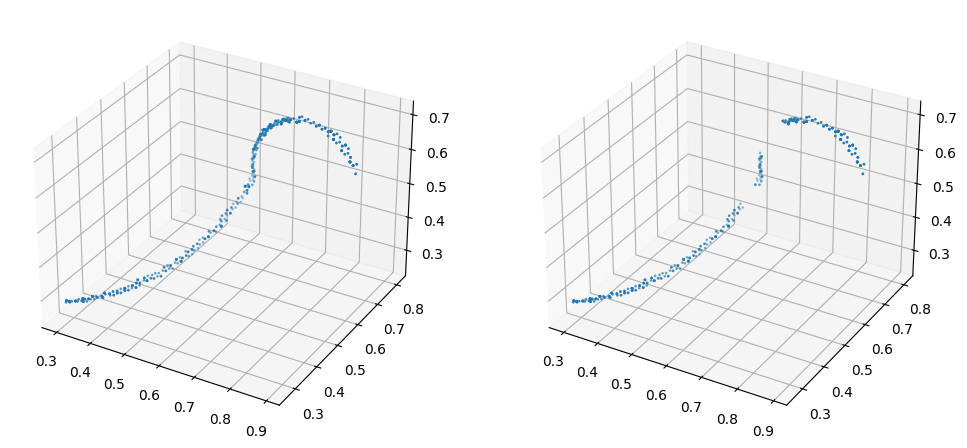

In [34]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
x_train, x_val, y_train, y_val = train_test_split(sorted, cut, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

sets = [x_train, x_val, x_test, y_train, y_val, y_test]

for s in sets:
    rng.shuffle(s, axis=1)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(projection='3d'))
ax[0].scatter(x_train[0, :, 0], x_train[0, :, 2], x_train[0, :, 1], s=1)
ax[1].scatter(y_train[0, :, 0], y_train[0, :, 2], y_train[0, :, 1], s=1)
plt.show()

np.save('./cut_sim_O16_train.npy', y_train)
np.save('./cut_sim_O16_val.npy', y_val)
np.save('./cut_sim_O16_test.npy', y_test)

np.save('./whole_sim_O16_train.npy', x_train)
np.save('./whole_sim_O16_val.npy', x_val)
np.save('./whole_sim_O16_test.npy', x_test)